In [4]:
# CO₂ Injection Temperature Analysis in Geological Formations

## Introduction:
This project aims to analyze the **CO₂ Injection Temperature** and **Pressure** in the **Smeaheia reservoir**, examining how these parameters vary with **depth** and how they influence the **effectiveness of CO₂ storage**. By understanding these dynamics, we aim to derive insights for optimizing the CO₂ injection process and assessing its long-term sustainability.


In [ ]:
## 1. Importing Required Libraries

We begin by importing the libraries necessary for loading data, performing data analysis, and creating visualizations.



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
## 2. Data Loading and Preprocessing
We load the temperature and pressure data from an Excel file, which contains the CO₂ injection temperature and pressure at various depths. Missing data is handled, and we select only the relevant columns for analysis.


In [7]:
# Load temperature and pressure data
Smeaheia_Norway_Temp_Pressure_data = pd.read_excel(r"C:\Users\Joy\OneDrive\Ambiente de Trabalho\CO2_Storage_Analysis\data\Smeaheia pressure and temperature .xlsx")

# Display the first few rows to check if the columns are selected properly
Smeaheia_Norway_Temp_Pressure_data.head()


,Depth (m),T (°C),CO₂ Injection T (°C),Pressure (bar)\t,Pressure Type
0,82,6.0,6,126,Initial
1,1020,37.0,6,105,Before Injection
2,1200,51.5,10,110,Before Injection
3,1500,62.6,20,130,Maximum


In [8]:
# Get a statistical summary of the dataset
summary_stats = Smeaheia_Norway_Temp_Pressure_data.describe()

# Display the summary
print(summary_stats)

         Depth (m)   T  (°C)  CO₂ Injection T  (°C)  Pressure (bar)\t
count     4.000000   4.00000               4.000000          4.000000
mean    950.500000  39.27500              10.500000        117.750000
std     611.915844  24.53506               6.608076         12.120919
min      82.000000   6.00000               6.000000        105.000000
25%     785.500000  29.25000               6.000000        108.750000
50%    1110.000000  44.25000               8.000000        118.000000
75%    1275.000000  54.27500              12.500000        127.000000
max    1500.000000  62.60000              20.000000        130.000000


In [ ]:
## 3. Exploratory Data Analysis (EDA)
In this section, we explore the relationships between CO₂ Injection Temperature and depth, as well as Pressure and depth. Various visualizations help uncover patterns and trends.

# Visualizations:
- CO₂ Injection Temperature vs Depth
- Pressure vs Depth
- Temperature Gradient Analysis
- Correlations between temperature and pressure


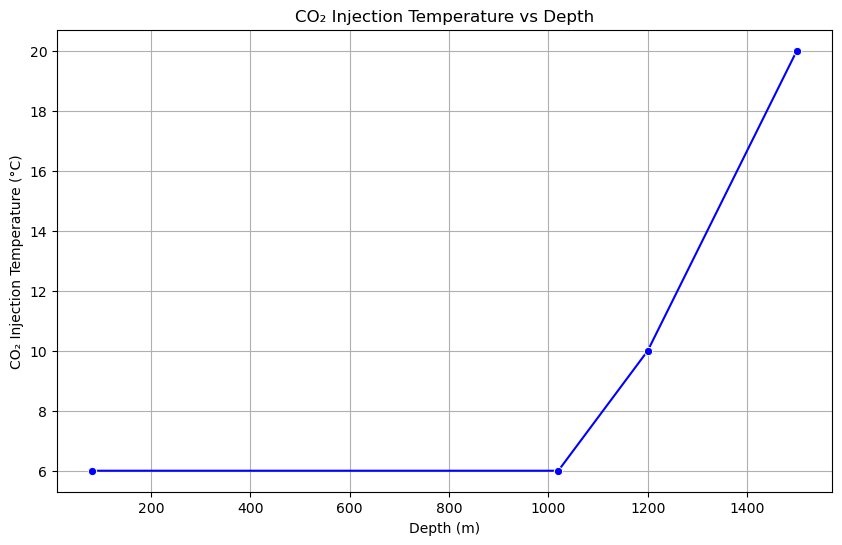

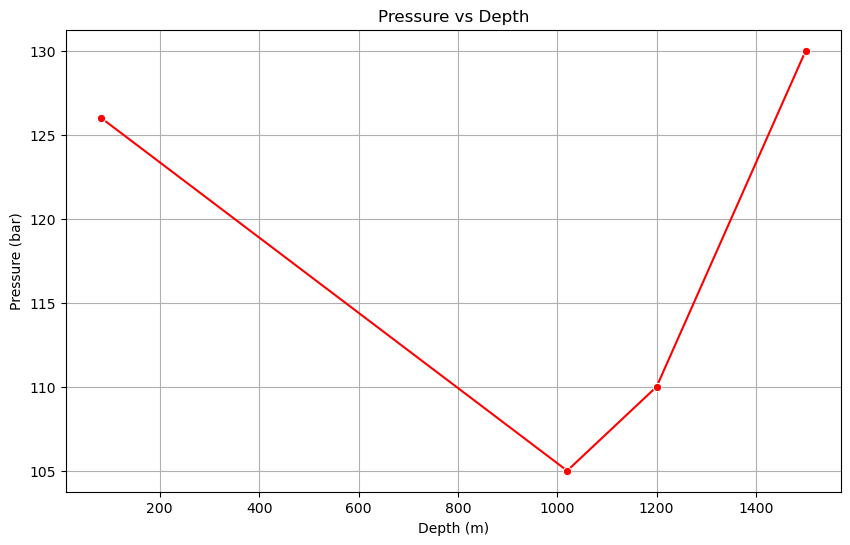

In [9]:
# Visualize CO₂ Injection Temperature vs Depth using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=Smeaheia_Norway_Temp_Pressure_data['Depth (m)'], 
             y=Smeaheia_Norway_Temp_Pressure_data['CO₂ Injection T  (°C)'], 
             marker="o", color='b')
plt.title('CO₂ Injection Temperature vs Depth')
plt.xlabel('Depth (m)')
plt.ylabel('CO₂ Injection Temperature (°C)')
plt.grid(True)
plt.show()

# Visualize Pressure vs Depth using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=Smeaheia_Norway_Temp_Pressure_data['Depth (m)'], 
             y=Smeaheia_Norway_Temp_Pressure_data['Pressure (bar)\t'], 
             marker="o", color='r')
plt.title('Pressure vs Depth')
plt.xlabel('Depth (m)')
plt.ylabel('Pressure (bar)')
plt.grid(True)
plt.show()


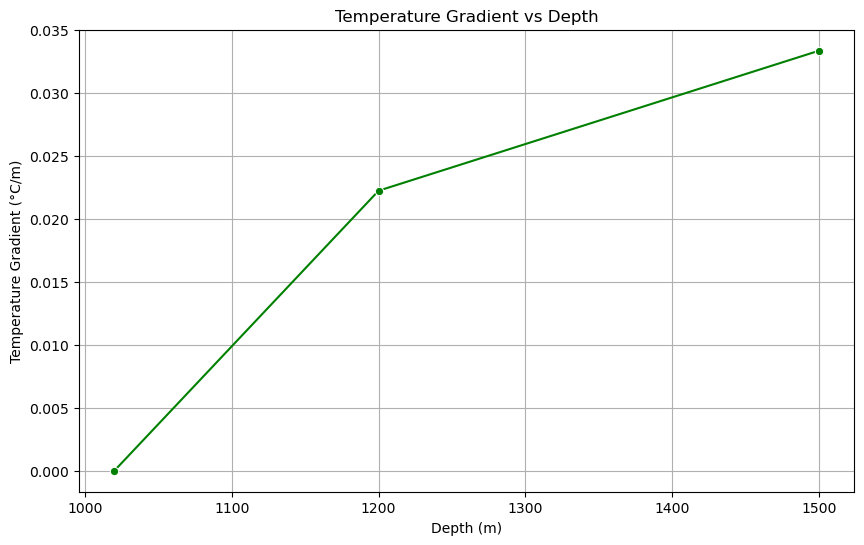

In [10]:
# Calculate Temperature Gradient
Smeaheia_Norway_Temp_Pressure_data['Temperature Gradient'] = Smeaheia_Norway_Temp_Pressure_data['CO₂ Injection T  (°C)'].diff() / Smeaheia_Norway_Temp_Pressure_data['Depth (m)'].diff()

# Plot Temperature Gradient vs Depth
plt.figure(figsize=(10, 6))
sns.lineplot(x=Smeaheia_Norway_Temp_Pressure_data['Depth (m)'], 
             y=Smeaheia_Norway_Temp_Pressure_data['Temperature Gradient'], 
             marker="o", color='g')
plt.title('Temperature Gradient vs Depth')
plt.xlabel('Depth (m)')
plt.ylabel('Temperature Gradient (°C/m)')
plt.grid(True)
plt.show()


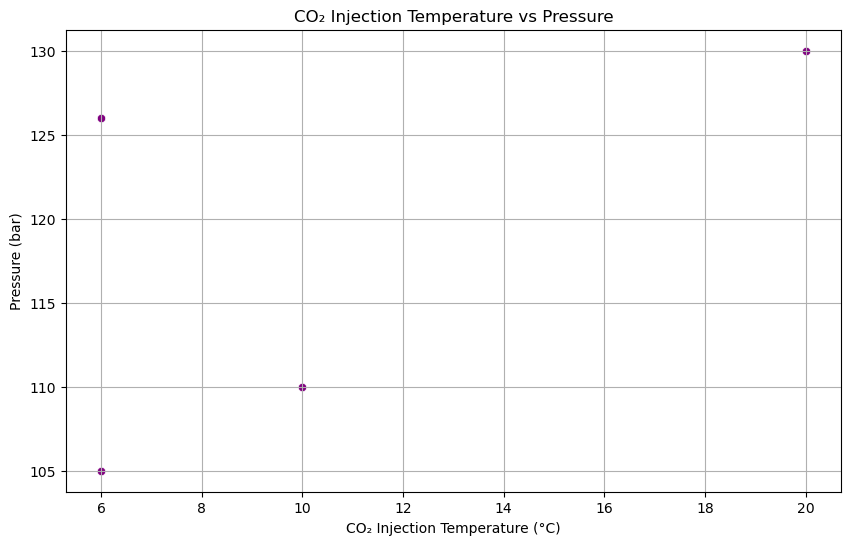

Pearson Correlation Coefficient between CO₂ Injection Temperature and Pressure: 0.584715378007949


In [11]:
# Scatter plot of CO₂ Injection Temperature vs Pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Smeaheia_Norway_Temp_Pressure_data['CO₂ Injection T  (°C)'], 
                y=Smeaheia_Norway_Temp_Pressure_data['Pressure (bar)\t'], 
                color='purple')
plt.title('CO₂ Injection Temperature vs Pressure')
plt.xlabel('CO₂ Injection Temperature (°C)')
plt.ylabel('Pressure (bar)')
plt.grid(True)
plt.show()# Scatter plot of CO₂ Injection Temperature vs Pressure

# Calculate Pearson Correlation Coefficient between Temperature and Pressure
correlation = Smeaheia_Norway_Temp_Pressure_data['CO₂ Injection T  (°C)'].corr(Smeaheia_Norway_Temp_Pressure_data['Pressure (bar)\t'])

# Display the correlation
print(f"Pearson Correlation Coefficient between CO₂ Injection Temperature and Pressure: {correlation}")


In [ ]:
## 4. Insights from the Data
Key insights from the EDA:

- CO₂ Injection Temperature increases with depth, suggesting thermal variations within the reservoir.
- Pressure trends show variations at different stages of CO₂ injection.
- Temperature gradients provide insights into thermal dynamics and CO₂ phase behavior.
- Moderate positive correlation between temperature and pressure indicates that temperature and pressure are somewhat related, but there are other factors at play that influence these parameters.

These insights help in understanding how temperature and pressure affect CO₂ storage efficiency.


In [ ]:
## 5. Feature Engineering

# Depth-Temperature Interaction:
We create an interaction term between depth and CO₂ Injection Temperature to help assess the impact of these parameters on CO₂ storage efficiency.


In [12]:
# Interaction term between depth and CO₂ injection temperature
Smeaheia_Norway_Temp_Pressure_data['Depth-Temperature Interaction'] = Smeaheia_Norway_Temp_Pressure_data['Depth (m)'] * Smeaheia_Norway_Temp_Pressure_data['CO₂ Injection T  (°C)']


In [ ]:
## 6. Modeling and Prediction

As we only have limited data points (4 data points), machine learning models like Linear Regression may not be effective. However, we will demonstrate the modeling steps with the available data.


In [13]:
# Split the data into training and testing sets (if more data is available)
X = Smeaheia_Norway_Temp_Pressure_data[['Depth (m)', 'CO₂ Injection T  (°C)']]
y = Smeaheia_Norway_Temp_Pressure_data['Pressure (bar)\t']

# Train/test split (only relevant for more data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 323.79469160428
R-squared (R²): -1.072286026267392


In [ ]:
The output indicates that the model might not be performing well.

Since our data is limited, more data would improve the predictive power of the model.

In [ ]:
## 7. Conclusion and Next Steps
The analysis of CO₂ Injection Temperature and Pressure in the Smeaheia reservoir reveals the following trends:

- CO₂ Injection Temperature increases with depth, suggesting a relationship between injection depth and temperature that affects CO₂ storage efficiency.
- Pressure shows variations, which are important for understanding the reservoir dynamics during CO₂ injection.

Given the limited data (only 4 data points), machine learning models like Linear Regression may not be effective. The results mainly provide descriptive insights rather than predictive models.

# Next Steps:
- Increase the Dataset: More data points across different depths will improve the ability to model and predict CO₂ storage efficiency.
- Statistical Analysis: Further statistical analyses, including correlation and variance analysis, can provide a better understanding of the relationship between temperature, pressure, and depth.
- Modeling with Additional Data: Once more data is available, advanced machine learning models like Linear Regression or Random Forest can be applied to predict CO₂ Injection Temperature and Pressure based on depth.
- Explore Reservoir Characteristics: Additional data on geological parameters (like porosity and permeability) can enhance the model for better CO₂ storage prediction.
